**DSDA Assignment-6**

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [2]:
# Step 2: Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target


In [3]:
# Step 4: Summarize the dataset
# 4.1: Dimensions of the dataset
print("Dataset Dimensions:", df.shape)


Dataset Dimensions: (150, 5)


In [4]:
# 4.2: Peek at the data
print("\nFirst 5 rows of the dataset:")
print(df.head())



First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [5]:

# 4.3: Statistical summary of all attributes
print("\nStatistical Summary:")
print(df.describe())



Statistical Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [6]:

# 4.4: Breakdown of the data by the class variable
print("\nClass Distribution:")
print(df['species'].value_counts())



Class Distribution:
species
0    50
1    50
2    50
Name: count, dtype: int64


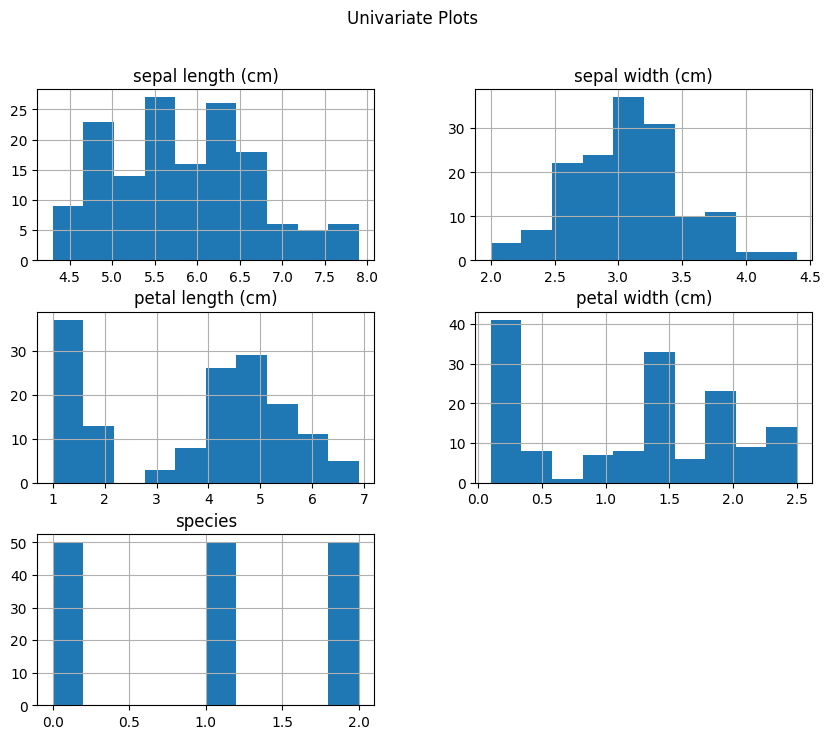

In [7]:
# Step 5: Visualize the dataset
# 5.1: Univariate plots (histograms)
df.hist(figsize=(10, 8))
plt.suptitle("Univariate Plots")
plt.show()



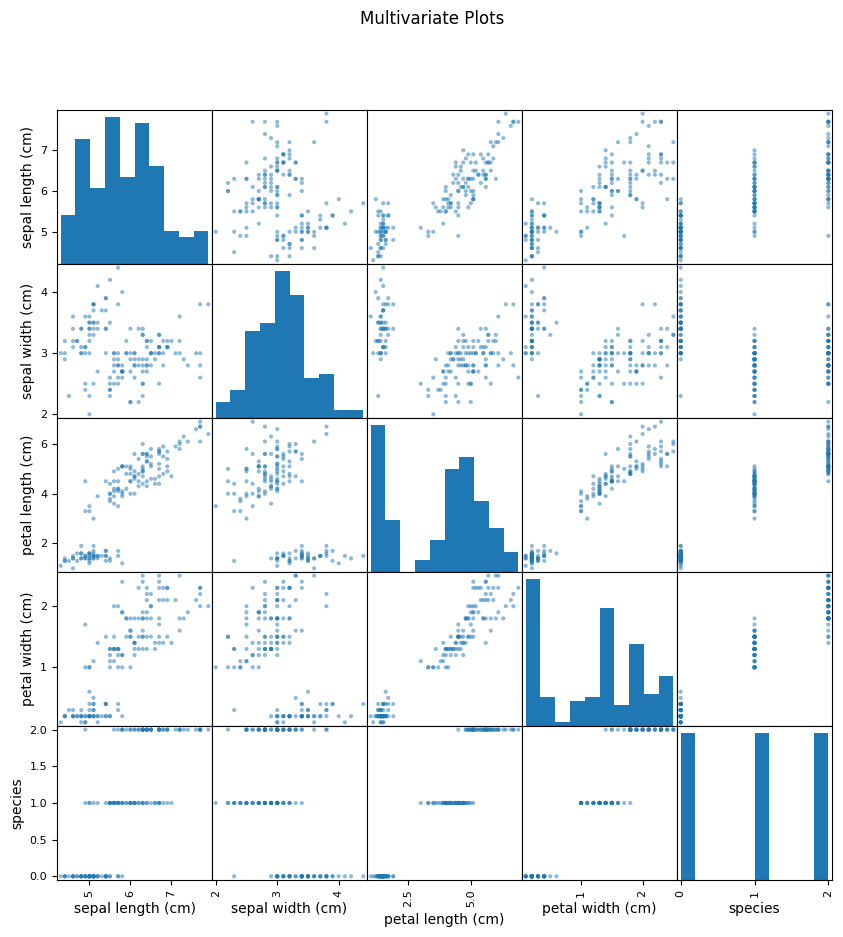

In [8]:
# 5.2: Multivariate plots (scatter plot matrix)
pd.plotting.scatter_matrix(df, figsize=(10, 10))
plt.suptitle("Multivariate Plots")
plt.show()


In [9]:
# Step 6: Evaluate some algorithms
# 6.1: Separate out a validation dataset
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=1
)


In [10]:
# 6.2: Set-up the test harness to use 10-fold cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)


In [11]:
# 6.3: Build multiple different models to predict species from flower measurements
models = [
    ('LR', LogisticRegression(max_iter=200)),  # max_iter is valid for LogisticRegression
    ('LDA', LinearDiscriminantAnalysis()),      # No max_iter needed for LDA
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]


In [12]:
# Initialize variables to track the best model and its accuracy
best_model = None
best_score = 0
best_model_name = ""

print("\nModel Evaluation Results:")
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    mean_score = scores.mean()
    print(f'{name}: {mean_score:.4f}')

    # Update the best model if the current model performs better
    if mean_score > best_score:
        best_score = mean_score
        best_model = model
        best_model_name = name

# Display the best model
print(f"\nBest Model: {best_model_name} with an accuracy of {best_score:.4f}")



Model Evaluation Results:
LR: 0.9667
LDA: 0.9750
KNN: 0.9583
CART: 0.9417
NB: 0.9500
SVM: 0.9667

Best Model: LDA with an accuracy of 0.9750


In [13]:
# Step 7: Make predictions with the best model
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)



In [17]:
# Step 8: Evaluate predictions
print("\nClassification Report for the Best Model:")
print(classification_report(y_test,predictions))


Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

